In [ ]:
!sudo apt-get install autoconf
!sudo apt-get install libtool
!sudo apt-get install liblapack-dev libblas-dev libfftw3-dev
!rm -rf itpp
!git clone https://github.com/iamviji/itpp.git # original one had compilation issue, did minor signle line change after forking
!ls;cd itpp;ls;mkdir -p build1 build2; cd build1 ; cmake cmake ..;make ;make install
!rm -rf py-itpp
!git clone https://github.com/vidits-kth/py-itpp.git


Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11.1).
autoconf set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libtool-doc gcj-jdk
The following NEW packages will be installed:
  libtool
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 161 kB of archives.
After this operation, 1,227 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Fetched 161 kB in 1s (253 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable 

In [ ]:
!pip3 install pybind11
!cd py-itpp;./install_prerequisites_python3.sh;make install;pip3 install -e .
!cd py-itpp; ls ; pip3 install -e .
!cat py-itpp/setup.py
#following 3 lines are added to resolve the issue
import sys
sys.path.append('./py-itpp/lib')
!cp -rf py-itpp/lib/itpp py-itpp/lib/pyitpp # import itpp is not working, after this hack i started to work


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 5.4 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,051 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubu

In [ ]:
import numpy as np
import pyitpp as itpp
from matplotlib import pyplot as plt
import cmath

In [ ]:
def BPSK(bits, SNRs):
  BER = []
  modulator_ = itpp.comm.BPSK_c()
  tx_signal = modulator_.modulate_bits(bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    ber = itpp.comm.BLERC(1)
    ber.count(bits, demodulated_bits)
    BER.append(ber.get_errorrate())
  return BER

In [ ]:
def PSK(bits, NofMod, SNRs):
  BER = []
  modulator_ = itpp.comm.PSK(NofMod)
  tx_signal = modulator_.modulate_bits(bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    ber = itpp.comm.BLERC(1)
    ber.count(bits, demodulated_bits)
    BER.append(ber.get_errorrate())
  return BER

In [ ]:
def QAM(bits, NofMod, SNRs):
  BER = []
  modulator_ = itpp.comm.QAM(NofMod)
  tx_signal = modulator_.modulate_bits(bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    ber = itpp.comm.BLERC(1)
    ber.count(bits, demodulated_bits)
    BER.append(ber.get_errorrate())
  return BER

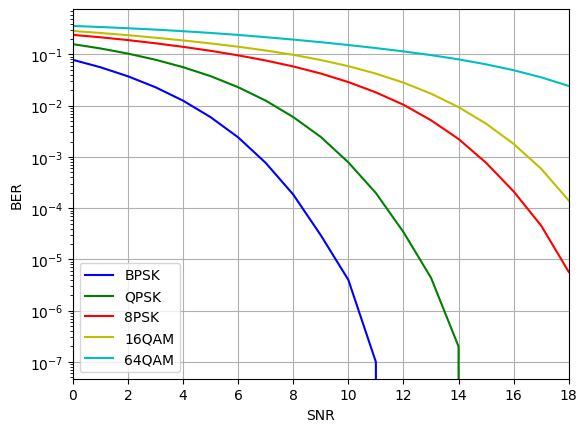

In [ ]:
nrof_bits = 10000000
source_bits = itpp.randb(nrof_bits)
snrs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
ber_bpsk = BPSK(source_bits, snrs)
ber_qpsk = PSK(source_bits, 4, snrs)
ber_8psk = PSK(source_bits, 8, snrs)
ber_16qam = QAM(source_bits, 16, snrs)
ber_64qam = QAM(source_bits, 64, snrs)

plt.figure()
plt.grid(True)
plt.xlim(0,18)
plt.xlabel('SNR')
plt.ylabel('BER')
plt.semilogy(snrs, ber_bpsk, c = 'b', label = 'BPSK')
plt.semilogy(snrs, ber_qpsk, c = 'g', label = 'QPSK')
plt.semilogy(snrs, ber_8psk, c = 'r', label = '8PSK')
plt.semilogy(snrs, ber_16qam, c = 'y', label = '16QAM')
plt.semilogy(snrs, ber_64qam, c = 'c', label = '64QAM')
plt.legend(loc='best')


In [ ]:
def hamm_qpsk(bits,m,SNRs):

  BER = []

  block_size = (2 ** m) - (1 + m)
  n = (2 ** m) - 1
  rate = float(block_size)/float(n)

  hamm = itpp.comm.Hamming_Code(m)
  encoded_bits = hamm.encode(bits)

  modulator_ = itpp.comm.QPSK()
  tx_signal = modulator_.modulate_bits(encoded_bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))/np.sqrt(2)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    decoded_bits = hamm.decode(demodulated_bits)

    blerc = itpp.comm.BLERC(1)
    blerc.count(bits, decoded_bits)
    
    BER.append(blerc.get_errorrate())
  return BER


In [ ]:
def hamm_16qam(bits,m,SNRs):

  BER = []

  block_size = (2 ** m) - (1 + m)
  n = (2 ** m) - 1
  rate = float(block_size)/float(n)

  hamm = itpp.comm.Hamming_Code(m)
  encoded_bits = hamm.encode(bits)

  modulator_ = itpp.comm.QAM(16)
  tx_signal = modulator_.modulate_bits(encoded_bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))/np.sqrt(2)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    decoded_bits = hamm.decode(demodulated_bits)

    blerc = itpp.comm.BLERC(1)
    blerc.count(bits, decoded_bits)
    
    BER.append(blerc.get_errorrate())
  return BER


In [ ]:
def rs_qpsk(bits,m,t,SNRs):

  BER = []

  block_size = (2 ** m) - (1 + 2 * t)
  n = (2 ** m) - 1
  rate = float(block_size)/float(n)

  rs = itpp.comm.Reed_Solomon(m,t,False,1)
  encoded_bits = rs.encode(bits)

  modulator_ = itpp.comm.QPSK()
  tx_signal = modulator_.modulate_bits(encoded_bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))/np.sqrt(2)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    decoded_bits = rs.decode(demodulated_bits)

    blerc = itpp.comm.BLERC(1)
    blerc.count(bits, decoded_bits)
    
    BER.append(blerc.get_errorrate())
  return BER


In [ ]:
def hamm_64qam(bits,m,SNRs):

  BER = []

  block_size = (2 ** m) - (1 + m)
  n = (2 ** m) - 1
  rate = float(block_size)/float(n)

  hamm = itpp.comm.Hamming_Code(m)
  encoded_bits = hamm.encode(bits)

  modulator_ = itpp.comm.QAM(64)
  tx_signal = modulator_.modulate_bits(encoded_bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))/np.sqrt(2)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    decoded_bits = hamm.decode(demodulated_bits)

    blerc = itpp.comm.BLERC(1)
    blerc.count(bits, decoded_bits)
    
    BER.append(blerc.get_errorrate())
  return BER


In [ ]:
def rs_64qam(bits,m,t,SNRs):

  BER = []

  block_size = (2 ** m) - (1 + 2 * t)
  n = (2 ** m) - 1
  rate = float(block_size)/float(n)

  rs = itpp.comm.Reed_Solomon(m,t,False,1)
  encoded_bits = rs.encode(bits)

  modulator_ = itpp.comm.QAM(64)
  tx_signal = modulator_.modulate_bits(encoded_bits)

  for snr in SNRs:
    noise_variance = (10 ** ((0-snr) * 0.1))/np.sqrt(2)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
    rx_signal = channel(tx_signal)

    demodulated_bits = modulator_.demodulate_bits(rx_signal)

    decoded_bits = rs.decode(demodulated_bits)

    blerc = itpp.comm.BLERC(1)
    blerc.count(bits, decoded_bits)
    
    BER.append(blerc.get_errorrate())
  return BER


In [ ]:
nrof_bits1 = 10000000
source_bits1 = itpp.randb(nrof_bits1)
snrs1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
ber_hammqp = hamm_qpsk(source_bits1, 3, snrs1)
ber_hamm16 = hamm_16qam(source_bits1, 3, snrs1)
ber_rsqp = rs_qpsk(source_bits1, 3, 2, snrs1)
ber_hamm64 = hamm_64qam(source_bits1, 3, snrs1)
ber_rs64 = rs_64qam(source_bits1, 3, 2, snrs1)






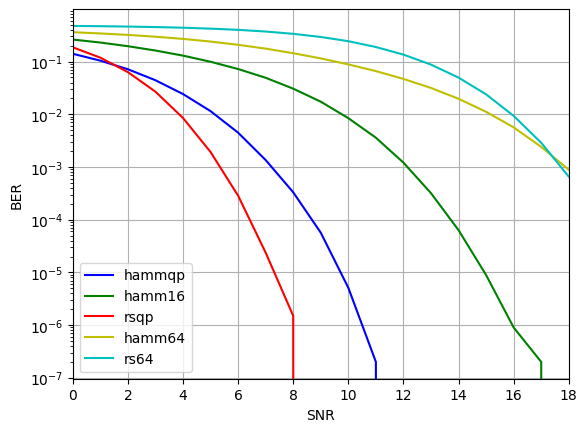

In [ ]:

plt.figure()
plt.grid(True)
plt.xlim(0,18)
plt.xlabel('SNR')
plt.ylabel('BER')
plt.semilogy(snrs1, ber_hammqp, c = 'b', label = 'hammqp')
plt.semilogy(snrs1, ber_hamm16, c = 'g', label = 'hamm16')
plt.semilogy(snrs1, ber_rsqp, c = 'r', label = 'rsqp')
plt.semilogy(snrs1, ber_hamm64, c = 'y', label = 'hamm64')
plt.semilogy(snrs1, ber_rs64, c = 'c', label = 'rs64')
plt.legend(loc='best')